In [44]:
from pydoc import describe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import scipy.stats as stats
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA feature selection for numeric input and categorical output
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn import neighbors
from sklearn import metrics

from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import pandas as pd 
import pandas as pd

In [69]:
#Lecture des données
df = pd.read_excel("/home/congo/Bureau/2022-m1-staps/motives_part/data_motives_final.xlsx","haller") 

In [71]:
#stoker le nom des colonnes
column_name = [c for c in df]

##                            Preprosseccing with fonction

In [29]:
# fonction !!
def imputation(df):
    # mise a zero des valeurs manquantes
    return df.fillna(0)
    

def preprocessing(data):
    data = imputation(data)
    # garder les valeurs qui nous concerne
    data = data.to_numpy()
    data = data[:,39:]

    # rendre toute les valeurs positives
    data_correct = data
    data = np.absolute(data)

    #Supression des valeurs abérantes par rapport au seuil
    seuil = 5*np.std(data,axis=0,dtype = np.float64)
    
    data = np.array(data)
    data_tmp = np.zeros_like(data)
    data_tmp[data < seuil] = data[data < seuil]
    data = data_tmp
    
    return data , data_correct



def Normalisation():
    data_clean , data_correct = preprocessing(data)

    #indices à suprimer
    max = np.max(data_clean,axis = 1)
    indices = [i for i, e in enumerate(max) if e == 0]
    

    #suppression des lignes
    data_del = np.delete(data_clean,indices,axis = 0)
    data_clean = data_del

    #normalisation par ligne sans ecartype nul pour avoir des valeurs entre 0 et 1
    min = np.min(data_clean,axis = 1)
    max = np.max(data_clean,axis = 1)
    data_clean = (data_clean-min[:,np.newaxis])/max[:,np.newaxis]

    # retour des valeurs négatives

    #suppression des lignes
    data_del = np.delete(data_correct,indices,axis = 0)
    data_correct = data_del

    #indices des valeurs négatives
    indices_val_neg_i = np.where(data_correct < 0)
    
    data_clean[indices_val_neg_i] = -1*data_clean[indices_val_neg_i]

    return data_clean

In [32]:
# utilisation des fonctions !!
data = imputation(df)

data_clean , data_correct = preprocessing(data)

data_ready = Normalisation()


## Transfert of data in Rstudio for clustering

In [81]:
# mettre data en df
df = pd.DataFrame(data_ready)

df_const = df.astype(float,errors='raise')
# renommer les colonne
df.columns = column_name[39:]
df_const.columns = column_name[39:]
#print(df.shape)



In [75]:
# 'Confiance en soi' par 'Confiance_en_soi'
# print(column_name[90])
column_name[90] = 'Confiance_en_soi'
# print(column_name[90])
df = df.rename(columns={'Confiance en soi':'Confiance_en_soi'}) 

# print(df['Confiance_en_soi'])

In [89]:
# df_cluster.info()
# probleme de type alors on le change
df = df.astype(float,errors='raise')
# df_cluster.info()

In [85]:
#renommer les lignes ( remplacer 0 par etudiant_0)
nlin,ncol = data_ready.shape
line_name = ['etudiant_' + str(i) for i in range(nlin)]
# print(line_name)
df.index = line_name
df_const.index = line_name
# print(df)

In [86]:
# with pd.ExcelWriter('data_ready.xlsx') as writer:
#     df.to_excel(writer, freeze_panes=(1,1))

In [90]:
df.to_csv('data_ready.csv')

##                            Preprosseccing

In [72]:
# mise a zero des valeurs manquantes
data = df.fillna(0)

#stoker le nom des colonnes
column_name = [c for c in data]


In [54]:
# garder les valeurs qui nous concerne
data = data.to_numpy()
data = data[:,39:]
nlin ,ncol =data.shape
print('data' ,data.shape)

data (1075, 71)


In [55]:
# rendre toute les valeurs positives
data_correct = data
data = np.absolute(data)

In [56]:
#Supression des valeurs abérantes par rapport au seuil
seuil = 5*np.std(data,axis=0,dtype = np.float64)
#print(seuil)
data = np.array(data)
data_tmp = np.zeros_like(data)
data_tmp[data < seuil] = data[data < seuil]
data = data_tmp
#print(data)

In [57]:
#normalisation par ligne (avec ecartype nul) our avoir des valeurs entre 0 et 1

#indices à suprimer
max = np.max(data,axis = 1)
indices = [i for i, e in enumerate(max) if e == 0]
#print(indices)

#suppression des lignes
data_del = np.delete(data,indices,axis = 0)
data = data_del

#normalisation par ligne sans ecartype nul pour avoir des valeurs entre 0 et 1
min = np.min(data,axis = 1)
max = np.max(data,axis = 1)
data = (data-min[:,np.newaxis])/max[:,np.newaxis]

#print(data)


In [58]:
# retour des valeurs négatives

#suppression des lignes
data_del = np.delete(data_correct,indices,axis = 0)
data_correct = data_del

#print("data before = ", data[data < 0])

#indices des valeurs négatives
indices_val_neg_i = np.where(data_correct < 0)
#print("indices_val_neg_i = ",indices_val_neg_i)

data[indices_val_neg_i] = -1*data[indices_val_neg_i]


#print("data after = ", data[data < 0] )
nlin ,ncol =data.shape

print(nlin,ncol)


1050 71


##   autres

In [72]:
# setwd("C:/Users/cschnitzler/Dropbox/staps/2021 2022/stage/master cmsi/job congo")
# library(readxl)

# data_motus <- read_excel("data_motus.xlsx")

# library(FactoMineR)
# library(Factoshiny)
# PCAshiny(data_motus)

## Tester la solidité de chaque cluster

In [120]:
df = pd.read_csv("/home/congo/Bureau/2022-m1-staps/data_motives/clustering.csv") 

In [121]:
df.drop(df.columns[[0]], axis = 1, inplace = True) 

In [122]:
df.head()

,cluster3,cluster4,cluster5,Confort,Securite,Qualite,Force,Maintien,Puissance,Competition,...,Serenite,Sexy,Plaisir,Groupe,Partage,Role,Performance,Meilleur,Individualiste,detente
0,1,1,1,0.072732,0.065028,0.079676,0.098327,0.029093,0.032083,0.030411,...,0.015611,0.079372,0.206386,0.169235,0.004866,0.031171,0.010998,0.035884,0.025494,0.024582
1,2,3,4,0.978229,0.256652,0.370343,0.252782,0.323174,0.327528,0.252540,...,0.017417,0.015723,0.019110,0.021287,0.021529,0.018868,0.021287,0.017900,0.024432,0.017658
2,1,1,1,0.070048,0.054323,0.062636,0.087573,0.090062,0.152751,0.101287,...,0.013713,0.285805,0.022343,0.007677,0.103828,0.133054,0.031556,0.070207,0.135014,0.175676
3,1,2,2,0.290419,0.741154,0.153511,0.216930,0.167392,0.185084,0.305117,...,0.136636,0.339412,0.185084,0.300490,0.092270,0.079750,0.236255,0.249864,0.272183,0.333696
4,1,1,1,0.029809,0.098887,0.045072,0.158585,0.116455,0.067727,0.050238,...,0.121065,0.029650,0.045072,0.216773,0.060254,0.059221,0.069078,0.077822,0.063037,0.159777


In [123]:
df_colonne = df.columns[ 3:]

données Train et validation

In [124]:
y_3 = df.loc[:,'cluster3']
y_4 = df.loc[:,'cluster4']
y_5 = df.loc[:,'cluster5']

In [170]:
X = df
X.drop(df.columns[[0,1,2]], axis = 1, inplace = True) 

<class 'pandas.core.frame.DataFrame'>


In [126]:

nelem = len(df)
X_train, X_test , y_train_3, y_test_3 = train_test_split (X,y_3, train_size = int(nelem*(2/3)), test_size = int(nelem*(1/3)),random_state = 0)
X_train_4, X_test_4 , y_train_4, y_test_4 = train_test_split (X,y_4, train_size = int(nelem*(2/3)), test_size = int(nelem*(1/3)),random_state = 0)
X_train_5, X_test_5 , y_train_5, y_test_5 = train_test_split (X,y_5, train_size = int(nelem*(2/3)), test_size = int(nelem*(1/3)),random_state = 0)



In [129]:
logreg = LogisticRegression()
logreg_4 = LogisticRegression()
logreg_5 = LogisticRegression()
logreg.fit(X_train,y_train_3)
logreg_4.fit(X_train_4,y_train_4)
logreg_5.fit(X_train_5,y_train_5)

LogisticRegression()

In [130]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier()
from sklearn import metrics

knn.fit(X_train,y_train_3)
y_pred_3_knn = knn.predict(X_test)
print( metrics.accuracy_score(y_test_3,y_pred_3_knn))

confusion = metrics.confusion_matrix(y_test_3, y_pred_3_knn)
print('confusion  \n' ,confusion)

0.9428571428571428
confusion  
 [[242   0   1]
 [ 14  22   0]
 [  4   1  66]]


In [131]:
# prediction pour le donner val
y_pred_3_class = logreg.predict(X_test)
y_pred_4_class = logreg.predict(X_test_4)
y_pred_5_class = logreg.predict(X_test_5)

calcul de l'accuracy

In [132]:

print( metrics.accuracy_score(y_test_3,y_pred_3_class))
print( metrics.accuracy_score(y_test_4,y_pred_4_class))
print( metrics.accuracy_score(y_test_5,y_pred_5_class))

0.9657142857142857
0.31142857142857144
0.2542857142857143


In [133]:
# comparer true and predicted response values
print('True' , y_test_3.values[0:25])
print('True 4' , y_test_4.values[0:25])
print('True 5 ' , y_test_5.values[0:25])
# y_pred_3_class  = y_pred_3_class.to_numpy()

print('Pred' , y_pred_3_class[0:25])
print('Pred 4 ' , y_pred_4_class[0:25])
print('Pred 5 ' , y_pred_5_class[0:25])

True [1 3 1 1 3 1 1 1 1 3 1 3 2 1 1 1 3 1 1 2 1 1 1 1 1]
True 4 [2 4 1 1 4 1 1 2 1 4 2 4 3 2 1 1 4 1 2 3 2 2 2 1 2]
True 5  [2 5 1 1 5 1 1 2 1 5 2 5 4 2 1 1 5 1 2 4 2 2 2 1 2]
Pred [1 3 1 1 3 1 1 1 1 3 1 3 2 1 1 1 3 1 1 2 1 1 1 1 1]
Pred 4  [1 3 1 1 3 1 1 1 1 3 1 3 2 1 1 1 3 1 1 2 1 1 1 1 1]
Pred 5  [1 3 1 1 3 1 1 1 1 3 1 3 2 1 1 1 3 1 1 2 1 1 1 1 1]


In [134]:
confusion = metrics.confusion_matrix(y_test_3, y_pred_3_class)
confusion_4 = metrics.confusion_matrix(y_test_4, y_pred_4_class)
confusion_5  = metrics.confusion_matrix(y_test_5, y_pred_5_class)
print('confusion  \n' ,confusion)
print('confusion 4 \n' ,confusion_4)
print('confusion 5 \n' ,confusion_5)

confusion  
 [[237   5   1]
 [  4  32   0]
 [  2   0  69]]
confusion 4 
 [[106   2   0   0]
 [131   3   1   0]
 [  4  32   0   0]
 [  2   0  69   0]]
confusion 5 
 [[ 86   0   0   0   0]
 [131   3   1   0   0]
 [ 20   2   0   0   0]
 [  4  32   0   0   0]
 [  2   0  69   0   0]]


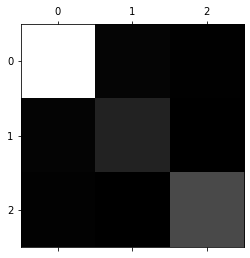

In [135]:
plt.matshow(confusion, cmap=plt.cm.gray)
plt.show()

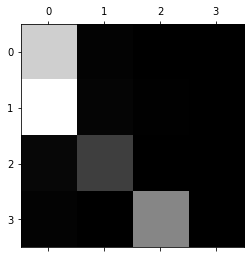

In [136]:
plt.matshow(confusion_4, cmap=plt.cm.gray)
plt.show()

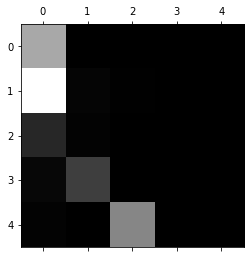

In [137]:
plt.matshow(confusion_5, cmap=plt.cm.gray)
plt.show()

In [138]:
print( 'recall_score : ',metrics.recall_score(y_test_3, y_pred_3_class,average=None))
print( 'recall_score 4 : ' ,metrics.recall_score(y_test_4, y_pred_4_class,average=None))
print( 'recall_score 5 : ' ,metrics.recall_score(y_test_5, y_pred_5_class,average=None))

recall_score :  [0.97530864 0.88888889 0.97183099]
recall_score 4 :  [0.98148148 0.02222222 0.         0.        ]
recall_score 5 :  [1.         0.02222222 0.         0.         0.        ]


In [139]:
print('precision_score :' ,metrics.precision_score(y_test_3, y_pred_3_class,average=None))
print('precision_score 4:' ,metrics.precision_score(y_test_4, y_pred_4_class,average=None))
print('precision_score 5:' ,metrics.precision_score(y_test_5, y_pred_5_class,average=None))

precision_score : [0.97530864 0.86486486 0.98571429]
precision_score 4: [0.43621399 0.08108108 0.         0.        ]
precision_score 5: [0.35390947 0.08108108 0.         0.         0.        ]


/home/congo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/congo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1]:

# setwd("C:/Users/cschnitzler/Dropbox/staps/2021 2022/stage/master cmsi/job congo")
# library(readxl)

# data_motus <- read_excel("data_motus.xlsx")

# library(FactoMineR)
# library(Factoshiny)
# PCAshiny(data_motus) 

# classification 

In [91]:
from pydoc import describe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import scipy.stats as stats
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA feature selection for numeric input and categorical output
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest ,f_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC ,SVC

from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier

from sklearn.pipeline import make_pipeline



from sklearn import neighbors
from sklearn import metrics

from sklearn.metrics import f1_score,confusion_matrix,classification_report
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve,recall_score
from sklearn.model_selection import learning_curve



In [92]:
df = pd.read_csv("/home/congo/Bureau/2022-m1-staps/motives_part/clustering.csv") 


In [93]:
df.drop(df.columns[[0]], axis = 1, inplace = True) 

In [94]:
df.head()

,cluster3,cluster4,cluster5,Confort,Securite,Qualite,Force,Maintien,Puissance,Competition,...,Serenite,Sexy,Plaisir,Groupe,Partage,Role,Performance,Meilleur,Individualiste,detente
0,1,1,1,0.072732,0.065028,0.079676,0.098327,0.029093,0.032083,0.030411,...,0.015611,0.079372,0.206386,0.169235,0.004866,0.031171,0.010998,0.035884,0.025494,0.024582
1,2,3,4,0.978229,0.256652,0.370343,0.252782,0.323174,0.327528,0.252540,...,0.017417,0.015723,0.019110,0.021287,0.021529,0.018868,0.021287,0.017900,0.024432,0.017658
2,1,1,1,0.070048,0.054323,0.062636,0.087573,0.090062,0.152751,0.101287,...,0.013713,0.285805,0.022343,0.007677,0.103828,0.133054,0.031556,0.070207,0.135014,0.175676
3,1,2,2,0.290419,0.741154,0.153511,0.216930,0.167392,0.185084,0.305117,...,0.136636,0.339412,0.185084,0.300490,0.092270,0.079750,0.236255,0.249864,0.272183,0.333696
4,1,1,1,0.029809,0.098887,0.045072,0.158585,0.116455,0.067727,0.050238,...,0.121065,0.029650,0.045072,0.216773,0.060254,0.059221,0.069078,0.077822,0.063037,0.159777


In [95]:
y_3 = df.loc[:,'cluster3']
y_4 = df.loc[:,'cluster4']
y_5 = df.loc[:,'cluster5']

In [96]:
X = df
X.drop(df.columns[[0,1,2]], axis = 1, inplace = True) 

In [97]:
train_ratio = 0.80
test_ratio = 0.10
validation_ratio = 0.10

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y_3, test_size=test_ratio)
X_train_3, X_valid_3, y_train_3, y_valid_3 = train_test_split(X_train_3, y_train_3, test_size=validation_ratio/(train_ratio+test_ratio))


X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X, y_4, test_size=test_ratio)
X_train_4, X_valid_4, y_train_4, y_valid_4 = train_test_split(X_train_4, y_train_4, test_size=validation_ratio/(train_ratio+test_ratio))

X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X, y_5, test_size=test_ratio)
X_train_5, X_valid_5, y_train_5, y_valid_5 = train_test_split(X_train_5, y_train_5, test_size=validation_ratio/(train_ratio+test_ratio))

In [173]:
model = LogisticRegression(C= 1.0, penalty="l2")
parameters = {"C":1.0, "penalty":"l2"}

## 1) Modelisation et choix de l'algorithme de sélection

In [99]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias = False) ,SelectKBest(f_classif , k=10))

In [100]:
RandomForest_3 = make_pipeline(preprocessor,RandomForestClassifier(random_state=0))
SVM_3 = make_pipeline(preprocessor,SVC(random_state=0))
KNN_3 = make_pipeline(preprocessor,KNeighborsClassifier())
logreg_3 = make_pipeline(preprocessor,LogisticRegression())
svc_3 = make_pipeline(preprocessor,LinearSVC())


In [132]:
dict_of_models ={ 'KNN' :KNN_3,
                'logreg' :logreg_3,
                'SVC' : svc_3,
                #'RandomForest' :RandomForest_3,
                'SVM': SVM_3}

Procédure d'évalution des modèles

In [133]:
def evaluation(model):
    model.fit(X_train_3,y_train_3)
    y_pred_3 = model.predict(X_test_3)
    print(confusion_matrix(y_test_3 , y_pred_3))
    print(classification_report(y_test_3 , y_pred_3))

    N, train_score ,val_score = learning_curve(model, X_train_3,y_train_3,train_sizes = np.linspace(0.1,1.0,10) ,cv=4)

    plt.figure(figsize =(12,8))
    plt.plot(N,train_score.mean(axis = 1), label ='train')
    plt.plot(N,val_score.mean(axis = 1), label ='validation')
    plt.legend()

KNN
[[70  4  1]
 [ 7  5  0]
 [ 1  0 17]]
              precision    recall  f1-score   support

           1       0.90      0.93      0.92        75
           2       0.56      0.42      0.48        12
           3       0.94      0.94      0.94        18

    accuracy                           0.88       105
   macro avg       0.80      0.76      0.78       105
weighted avg       0.87      0.88      0.87       105

logreg
[[74  0  1]
 [12  0  0]
 [ 3  0 15]]
              precision    recall  f1-score   support

           1       0.83      0.99      0.90        75
           2       0.00      0.00      0.00        12
           3       0.94      0.83      0.88        18

    accuracy                           0.85       105
   macro avg       0.59      0.61      0.59       105
weighted avg       0.75      0.85      0.80       105



/home/congo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/congo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/congo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC
[[73  1  1]
 [ 2 10  0]
 [ 2  0 16]]
              precision    recall  f1-score   support

           1       0.95      0.97      0.96        75
           2       0.91      0.83      0.87        12
           3       0.94      0.89      0.91        18

    accuracy                           0.94       105
   macro avg       0.93      0.90      0.91       105
weighted avg       0.94      0.94      0.94       105

SVM
[[72  2  1]
 [10  2  0]
 [ 1  0 17]]
              precision    recall  f1-score   support

           1       0.87      0.96      0.91        75
           2       0.50      0.17      0.25        12
           3       0.94      0.94      0.94        18

    accuracy                           0.87       105
   macro avg       0.77      0.69      0.70       105
weighted avg       0.84      0.87      0.84       105



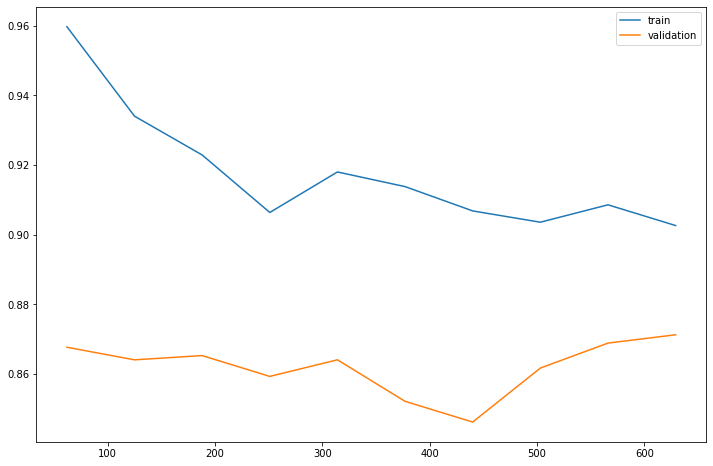

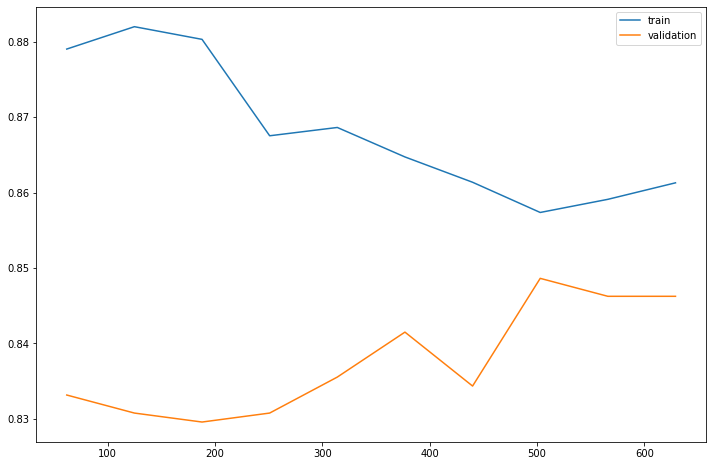

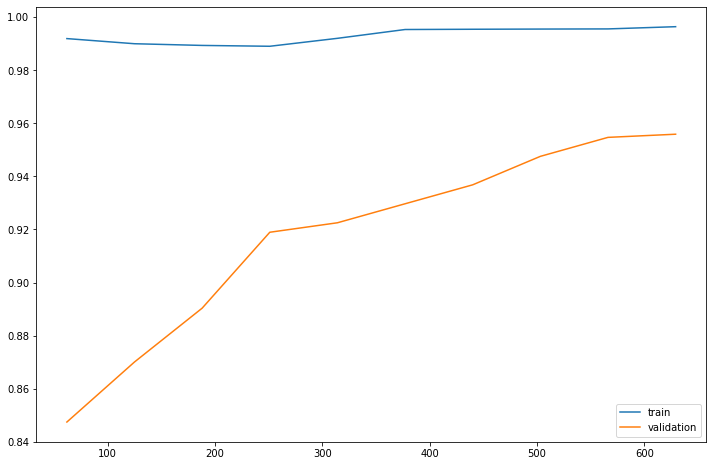

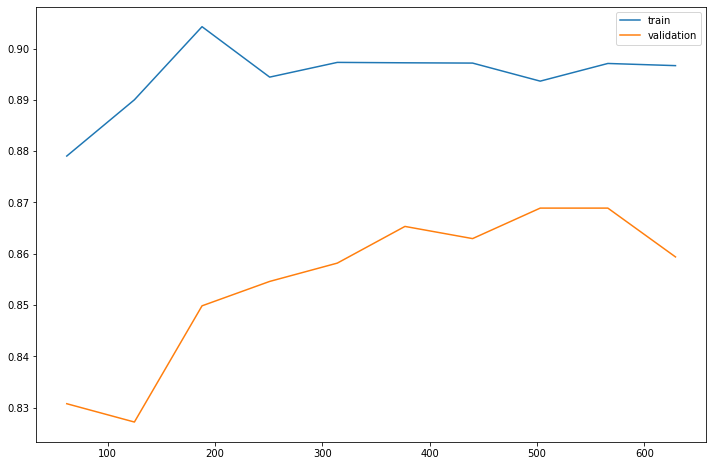

In [134]:
for names,model in dict_of_models.items() :
     print(names)
     evaluation(model)

Optimisation des hyperparametres du modèle SVC et logistic

In [155]:
def optimiseur(model , parameters):
    grid = GridSearchCV(model,parameters)
    grid.fit(X_train_3,y_train_3)

    print("best parameters ",grid.best_params_)
    print("accuracy :",grid.best_score_)



In [165]:
# optimiser SVC
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
model = SVC()
# optimiseur(model , parameters)

best parameters  {'C': 10, 'kernel': 'rbf'}
accuracy : 0.9535215283718278


In [167]:
#bon parametre SVC
model = SVC(kernel= 'rbf', C = 10)
parameters = {'kernel':'rbf', 'C':10}

In [160]:
# optimiser LogisticRegression
parameters = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
model = LogisticRegression()
#optimiseur(model , parameters)

In [ ]:
# bon parametre LogisticRegression
model = LogisticRegression(C= 1.0, penalty="l2")
parameters = {"C":1.0, "penalty":"l2"}


In [144]:
# SVC semble mieux !!!
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc_3 = SVC()

grid = GridSearchCV(svc_3,parameters)

grid.fit(X_train_3,y_train_3)


y_pred_3 = grid.predict(X_test_3)

print(classification_report(y_test_3,y_pred_3))


              precision    recall  f1-score   support

           1       0.96      0.97      0.97        75
           2       0.92      0.92      0.92        12
           3       0.94      0.89      0.91        18

    accuracy                           0.95       105
   macro avg       0.94      0.93      0.93       105
weighted avg       0.95      0.95      0.95       105



In [143]:
# logistic
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
grid = GridSearchCV(logreg,grid,cv=10)
grid.fit(X_train_3,y_train_3)


# print(grid.best_params_)

# y_pred_3 = grid.predict(X_test_3)

# print(classification_report(y_test_3,y_pred_3))



/home/congo/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/congo/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [138]:
logreg2=LogisticRegression(C=1,penalty="l2")
logreg2.fit(X_train_3,y_train_3)
print("score",logreg2.score(X_test_3,y_test_3))

score 0.9619047619047619


Precision recall

In [45]:
#precision ,recall,threshold =  precision_recall_curve(y_test_3,grid.best_estimator_)

# plt.plot(threshold,precision[::-1], label ='precision')
# plt.plot(threshold,recall[::-1], label ='recall')
# plt.legend()

#def model_final(model , X,threshold= 0.05):
#     return model.decision_function(X) > threshold


# y_pred_3 = model_final(grid.best_estimator_,X_test_3, threshold=-1)

# print(y_pred_3.shape)

In [129]:
f1_score(y_test_3,y_pred_3,average = 'macro')


0.9481638879808215

In [131]:
recall_score(y_test_3,y_pred_3,average = 'macro')

0.9307407407407408

## 2) Feature selection (éliminer les colonnes à faible variance)

In [146]:
# X_valid_3.var(axis = 0).sort_values()

In [ ]:
def selection_feature (X_test_3,seuil = 0.05):
    # élemination des colonnes à variances inferieur au seuil 0.1 ou 0.05
    selector = VarianceThreshold(threshold=seuil)
    selector.fit_transform(X_test_3)
    colonne_garder = np.array(X_test_3.columns)[selector.get_support()]

    print(colonne_garder)


In [222]:
# élemination des colonnes à variances inferieur au seuil 0.1 ou 0.05
selector = VarianceThreshold(threshold=0.05)
selector.fit_transform(X_test_3)
colonne_garder = np.array(X_test_3.columns)[selector.get_support()]

print(colonne_garder)

['Galbant' 'Stretchcing' 'Plaisir' 'Partage' 'Performance' 'Meilleur'
 'detente']


In [221]:
# élemination des colonnes à variances inferieur au seuil 0.1 ou 0.05
selector = VarianceThreshold(0.05)
selector.fit_transform(X_test_3)
colonne_garder = np.array(X_test_3.columns)[selector.get_support()]

print(colonne_garder)

['Galbant' 'Stretchcing' 'Plaisir' 'Partage' 'Performance' 'Meilleur'
 'detente']


## 3) tester avec le modèle final

In [219]:
# prediction avec uniquement les colonne garder
X_test_3 = X_test_3[colonne_garder] 
X_train_3 = X_train_3[colonne_garder] 

print(X_test_3.shape)

(105, 7)


In [214]:
def fit_model (model):
    model.fit(X_train_3,y_train_3)

def prediction ( model ,X_test_3,y_test_3 ):
    # prediction
    y_pred_3_log = model.predict(X_test_3)
    print( 'accuracy log_3' ,metrics.accuracy_score(y_true = y_test_3, y_pred = y_pred_3_log))
    return y_pred_3_log

def matrice_confusion(y_test_3, y_pred_3_log):
    # Matrice de confusion
    confusion_3 = metrics.confusion_matrix(y_true = y_test_3,y_pred = y_pred_3_log)
    print('confusion  log_3 \n' ,confusion_3)

    plt.matshow(confusion_3, cmap=plt.cm.gray)
    plt.show()


In [215]:
# bon parametre LogisticRegression
model = LogisticRegression(C= 1.0, penalty="l2")
parameters = {"C":1.0, "penalty":"l2"}

In [216]:
fit_model(model)
y_pred_3_log = prediction(model ,X_test_3,y_test_3)

accuracy log_3 0.8476190476190476


confusion  log_3 
 [[74  0  1]
 [12  0  0]
 [ 2  1 15]]


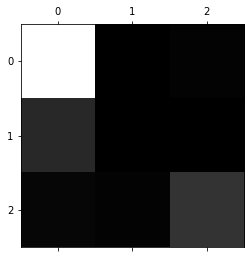

In [217]:
matrice_confusion(y_test_3, y_pred_3_log)

In [ ]:
# entrainement avec le modele garder 
model = LogisticRegression()
parameters = {"C":1.0, "penalty":"l2"}
model.fit(X_train_3,y_train_3)

# prediction
y_pred_3_log = model.predict(X_test_3)
print( 'accuracy log_3' ,metrics.accuracy_score(y_test_3,y_pred_3_log))


# Matrice de confusion
confusion_3 = metrics.confusion_matrix(y_test_3, y_pred_3_log)
print('confusion  log_3 \n' ,confusion_3)

plt.matshow(confusion_3, cmap=plt.cm.gray)
plt.show()

In [151]:
# entrainement avec le modele garder 
logreg_3.fit(X_train_3,y_train_3)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest())])),
                ('logisticregression', LogisticRegression())])

In [152]:
y_pred_3_log = logreg_3.predict(X_test_3)
print( 'accuracy log_3' ,metrics.accuracy_score(y_test_3,y_pred_3_knn))

confusion_3 = metrics.confusion_matrix(y_test_3, y_pred_3_knn)
print('confusion  log_3 \n' ,confusion_3)

NameError: name 'y_pred_3_knn' is not defined

In [153]:
plt.matshow(confusion_3, cmap=plt.cm.gray)
plt.show()

NameError: name 'confusion_3' is not defined

In [154]:
# __init__.py pour creer les package 

# pour test :pip3 install pytest
# import pytest